In [1]:
import tweepy
import csv
import pandas as pd
import datetime

In [2]:
####input your credentials here
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token = 'XXXXXXXXXXXXXXXXXXX-XXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

from tweepy.auth import OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
previousHour = datetime.datetime.now()
csvfile = 'TwitterRT.csv'
count = 0

import numpy as np

time = []
values = []
text = []
coin = 'MAID CRYPTO'
# Open/Create a file to append data
with open(csvfile, 'w') as csvfile:
    fieldnames = ['Coin', 'Time', 'Count']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    
    for tweet in tweepy.Cursor(api.search,q=coin,count=100,
                           lang="en",
                           since="2017-12-30").items():
        count += 1
        if tweet.created_at.hour != previousHour.hour:
            previousHour = tweet.created_at
            writer.writerow({'Coin': coin, 
                             'Time': tweet.created_at, 
                             'Count': count})
            #print(tweet.created_at.hour, ':', count)
            time.append(tweet.created_at)
            values.append(count)
            text.append(tweet.text)
            count = 0

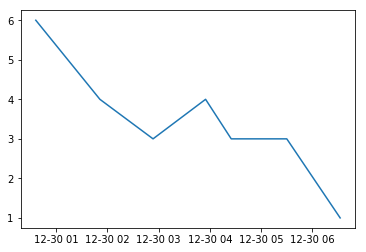

<function matplotlib.pyplot.show>

In [3]:
import matplotlib.pyplot as plt

plt.figure()
ts = pd.DataFrame(values, time)

plt.plot(time,values)
plt.show()
#plt.figure()
#ts = ts.cumsum()
ts.plot()
plt.show
#plt.legend(loc='best')


In [4]:
pd.set_option('display.max_columns', None)  
pd.options.display.max_rows = 4000
ts

,0
2017-12-30 06:32:31,1
2017-12-30 05:30:04,3
2017-12-30 04:25:02,3
2017-12-30 03:55:02,4
2017-12-30 02:53:33,3
2017-12-30 01:51:21,4
2017-12-30 00:36:20,6
